In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca
from sklearn import linear_model

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [2]:
# Path to your Excel file
SOURCE_DATA_SF3 = 'SupplementaryFigure3.xlsx'

# Read specific sheet and ranges
mf = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='A:HY', skiprows=2, nrows=502)
pc = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='HZ:TP', skiprows=2, nrows=502)

# rate is ssc0, drate is wv0
lm_MF = {
    'rate': mf.iloc[:, 0:116].to_numpy().T,
    'drate': mf.iloc[:, 116:232].to_numpy().T,
    'v0': mf.iloc[0, 232],
    'label': 'MF'
}

lm_PC = {
    'rate': pc.iloc[:, 0:151].to_numpy().T,
    'drate': pc.iloc[:, 151:302].to_numpy().T,
    'v0': pc.iloc[0, 302],
    'label': 'PC'
}

# for analyze data
data_mf = lm_MF['rate']
data_pc = lm_PC['rate']

In [3]:
# Load FN cell data

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
data_fn = np.mean(data_cat_sm, axis=0)

In [64]:
sp_fn = []
sp_size = []
for a in range(len(data_cat)):

    temp_cat = np.concatenate(data_cat[a])
    sp_size.append(np.shape(temp_cat)[0])
    sp_fn.append(temp_cat)

sp_fn = np.array(sp_fn, dtype = object)
sp_size = np.array(sp_size)

In [52]:
data_cat = np.array(data_cat)[:, :8]

In [58]:
np.concatenate(data_cat[1]).shape

(307, 600)

In [50]:
np.shape(data_fn)

(67, 600)

In [32]:
temp = data_cat[1][1]
temp2 = data_cat_sm[1][1]

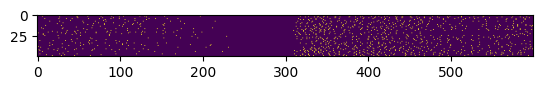

In [21]:
plt.imshow(temp)

In [30]:
Total_p = temp.shape[0]

In [31]:
SS / Total_p

array([0.02, 0.04, 0.02, 0.06, 0.02, 0.04, 0.04, 0.08, 0.  , 0.04, 0.02,
       0.02, 0.  , 0.04, 0.  , 0.06, 0.  , 0.  , 0.06, 0.02, 0.02, 0.  ,
       0.  , 0.  , 0.06, 0.04, 0.04, 0.06, 0.02, 0.06, 0.06, 0.06, 0.  ,
       0.02, 0.06, 0.04, 0.02, 0.02, 0.02, 0.  , 0.02, 0.02, 0.06, 0.  ,
       0.  , 0.06, 0.04, 0.08, 0.08, 0.04, 0.  , 0.  , 0.08, 0.  , 0.  ,
       0.04, 0.06, 0.  , 0.02, 0.  , 0.02, 0.04, 0.04, 0.04, 0.04, 0.  ,
       0.08, 0.04, 0.02, 0.02, 0.02, 0.06, 0.  , 0.02, 0.02, 0.02, 0.02,
       0.04, 0.  , 0.02, 0.02, 0.04, 0.06, 0.06, 0.02, 0.02, 0.  , 0.06,
       0.02, 0.04, 0.04, 0.  , 0.04, 0.  , 0.02, 0.08, 0.02, 0.  , 0.  ,
       0.1 , 0.  , 0.  , 0.02, 0.06, 0.04, 0.  , 0.04, 0.  , 0.04, 0.06,
       0.06, 0.  , 0.02, 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.04, 0.04, 0.06, 0.02, 0.04, 0.  , 0.08, 0.  ,
       0.04, 0.  , 0.04, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04,
       0.02, 0.02, 0.04, 0.02, 0.  , 0.  , 0.  , 0.

In [24]:
SS = temp.sum(axis=0)

In [48]:
CS = temp.mean(axis=0)
CS_idx = np.argsort(temp2)[::-1][0]

In [4]:
# Distance matrix by cross correlation

from scipy import signal

lags_total=[]
for a in range(len(data_mf)):
    
    plags_total = []
    for b in range(len(data_mf)):
    
        signal1 = data_mf[a]
        signal2 = data_mf[b]
        
        # Calculate cross-correlation
        cross_correlation = signal.correlate(signal1, signal2)
        lags = signal.correlation_lags(len(signal1), len(signal2))
    
        m_idx = np.argmax(cross_correlation)
        plags_total.append(lags[m_idx])
    
    lags_total.append(plags_total)
lags_total = np.array(lags_total)
    

In [5]:
lags_total[0]

array([   0,    2,    3,  -29,    1,    0,   -2,   -7,   15,    0,  -14,
         12,    0,   -2,   -8,    0,   13,    1,   -5,  -11,   14,    0,
       -430,   22,   14,   19,   21,   39,    0,    6,   28,   18,   83,
       -413,   12,  125,   20,   15,   22,    0,    7,   16,   11,   12,
         14,   18,    6,   27,   22,   17,   36,   19,   35,   45,   -9,
         23,   -8,   20,   25,   17,   13,    3,   -3,  168,    8,    2,
         16,   33,   26,   17,   20,    5,   23,   18,   28,   30,   16,
         17,   20,   27,    8,   18,   17,    7,  -88,   15,    7,    3,
          1,   -8,  -21,   14,    2,    6,   -1,   -1,    8,    4,   -8,
         -1,    9,    9,  -10,  -11,   -6,    0,    6,    0,   10,    3,
          1,   14,   -1,   14,   -1, -112])

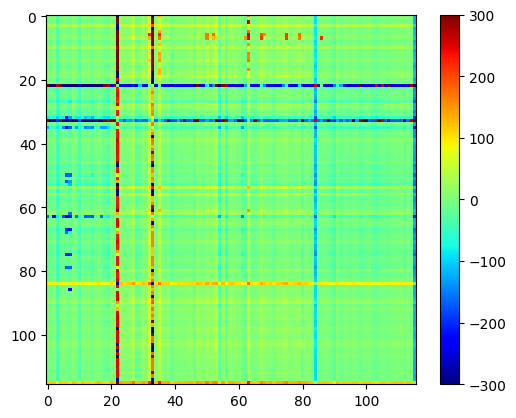

In [6]:
plt.imshow(lags_total, aspect='equal', cmap='jet', origin='upper')
plt.clim(-300, 300)
plt.colorbar()

In [ ]:
# Sorting cells depending on lag

lags_total_cat = []
c_num = []
for a in lags:
    idx_temp = np.where(lags_total == a)
    lags_total_cat.append(idx_temp[0])

    c_num.append(len(idx_temp[0]))

lags_total_cat = np.array(lags_total_cat, dtype = object)